# Importing the required libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [2]:
df = pd.read_csv("class12-2022.csv")

In [3]:
# To display the top 5 rows
df.head(5)

,Class,Year,Type,Status,CTSA,GOVT,GOVT AIDED,INDEPENDENT,JNV,KV
0,12,2022,Ajmer,Regd.,0,4533,0,86178,3741,7736
1,12,2022,Ajmer,Appd.,0,4524,0,85839,3730,7725
2,12,2022,Bhubaneswar,Regd.,103,7746,0,69835,3823,11465
3,12,2022,Bhubaneswar,Appd.,101,7688,0,69506,3809,11431
4,12,2022,Chandigarh,Regd.,0,13060,55,89637,2549,5861


In [4]:
df.tail(5)

,Class,Year,Type,Status,CTSA,GOVT,GOVT AIDED,INDEPENDENT,JNV,KV
27,12,2022,Trivandrum,Appd.,0,82,0,33462,972,3661
28,12,2022,Dehradun,Regd.,164,1555,22,62473,1120,4312
29,12,2022,Dehradun,Appd.,162,1552,22,62094,1117,4307
30,12,2022,Delhi West,Regd.,0,69504,7775,40461,65,2872
31,12,2022,Delhi West,Appd.,0,69109,7743,40291,65,2872


In [5]:
df.dtypes

Class           int64
Year            int64
Type           object
Status         object
CTSA            int64
GOVT            int64
GOVT AIDED      int64
INDEPENDENT     int64
JNV             int64
KV              int64
dtype: object

In [10]:
# df = df.drop(['panchayat_name'], axis = 1)

In [6]:
df.head(5)

,Class,Year,Type,Status,CTSA,GOVT,GOVT AIDED,INDEPENDENT,JNV,KV
0,12,2022,Ajmer,Regd.,0,4533,0,86178,3741,7736
1,12,2022,Ajmer,Appd.,0,4524,0,85839,3730,7725
2,12,2022,Bhubaneswar,Regd.,103,7746,0,69835,3823,11465
3,12,2022,Bhubaneswar,Appd.,101,7688,0,69506,3809,11431
4,12,2022,Chandigarh,Regd.,0,13060,55,89637,2549,5861


In [7]:
#df = df.rename(columns={"dateof_commencement": "commencement", "dateof_completion": "completion"})
df.head(5)

,Class,Year,Type,Status,CTSA,GOVT,GOVT AIDED,INDEPENDENT,JNV,KV
0,12,2022,Ajmer,Regd.,0,4533,0,86178,3741,7736
1,12,2022,Ajmer,Appd.,0,4524,0,85839,3730,7725
2,12,2022,Bhubaneswar,Regd.,103,7746,0,69835,3823,11465
3,12,2022,Bhubaneswar,Appd.,101,7688,0,69506,3809,11431
4,12,2022,Chandigarh,Regd.,0,13060,55,89637,2549,5861


In [8]:
df.shape

(32, 10)

In [9]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10)


In [10]:
df.count()

Class          32
Year           32
Type           32
Status         32
CTSA           32
GOVT           32
GOVT AIDED     32
INDEPENDENT    32
JNV            32
KV             32
dtype: int64

In [11]:
df = df.drop_duplicates()
df.head(5)

,Class,Year,Type,Status,CTSA,GOVT,GOVT AIDED,INDEPENDENT,JNV,KV
0,12,2022,Ajmer,Regd.,0,4533,0,86178,3741,7736
1,12,2022,Ajmer,Appd.,0,4524,0,85839,3730,7725
2,12,2022,Bhubaneswar,Regd.,103,7746,0,69835,3823,11465
3,12,2022,Bhubaneswar,Appd.,101,7688,0,69506,3809,11431
4,12,2022,Chandigarh,Regd.,0,13060,55,89637,2549,5861


In [12]:
df.count()

Class          32
Year           32
Type           32
Status         32
CTSA           32
GOVT           32
GOVT AIDED     32
INDEPENDENT    32
JNV            32
KV             32
dtype: int64

In [13]:
print(df.isnull().sum())

Class          0
Year           0
Type           0
Status         0
CTSA           0
GOVT           0
GOVT AIDED     0
INDEPENDENT    0
JNV            0
KV             0
dtype: int64


In [14]:
df = df.dropna()    # Dropping the missing values.
df.count()

Class          32
Year           32
Type           32
Status         32
CTSA           32
GOVT           32
GOVT AIDED     32
INDEPENDENT    32
JNV            32
KV             32
dtype: int64

In [15]:
print(df.isnull().sum())   # After dropping the values

Class          0
Year           0
Type           0
Status         0
CTSA           0
GOVT           0
GOVT AIDED     0
INDEPENDENT    0
JNV            0
KV             0
dtype: int64


<AxesSubplot:xlabel='KV'>

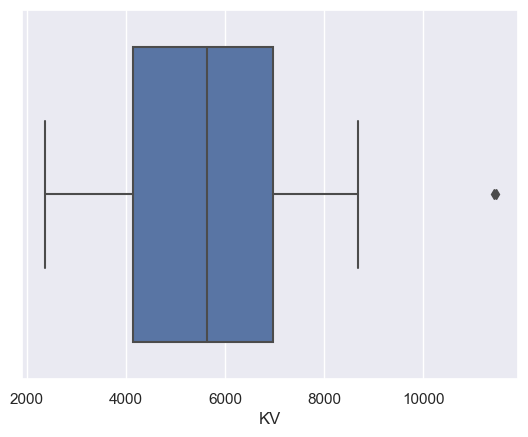

In [17]:
sns.boxplot(x=df['KV'])

# Heat Map

<AxesSubplot:>

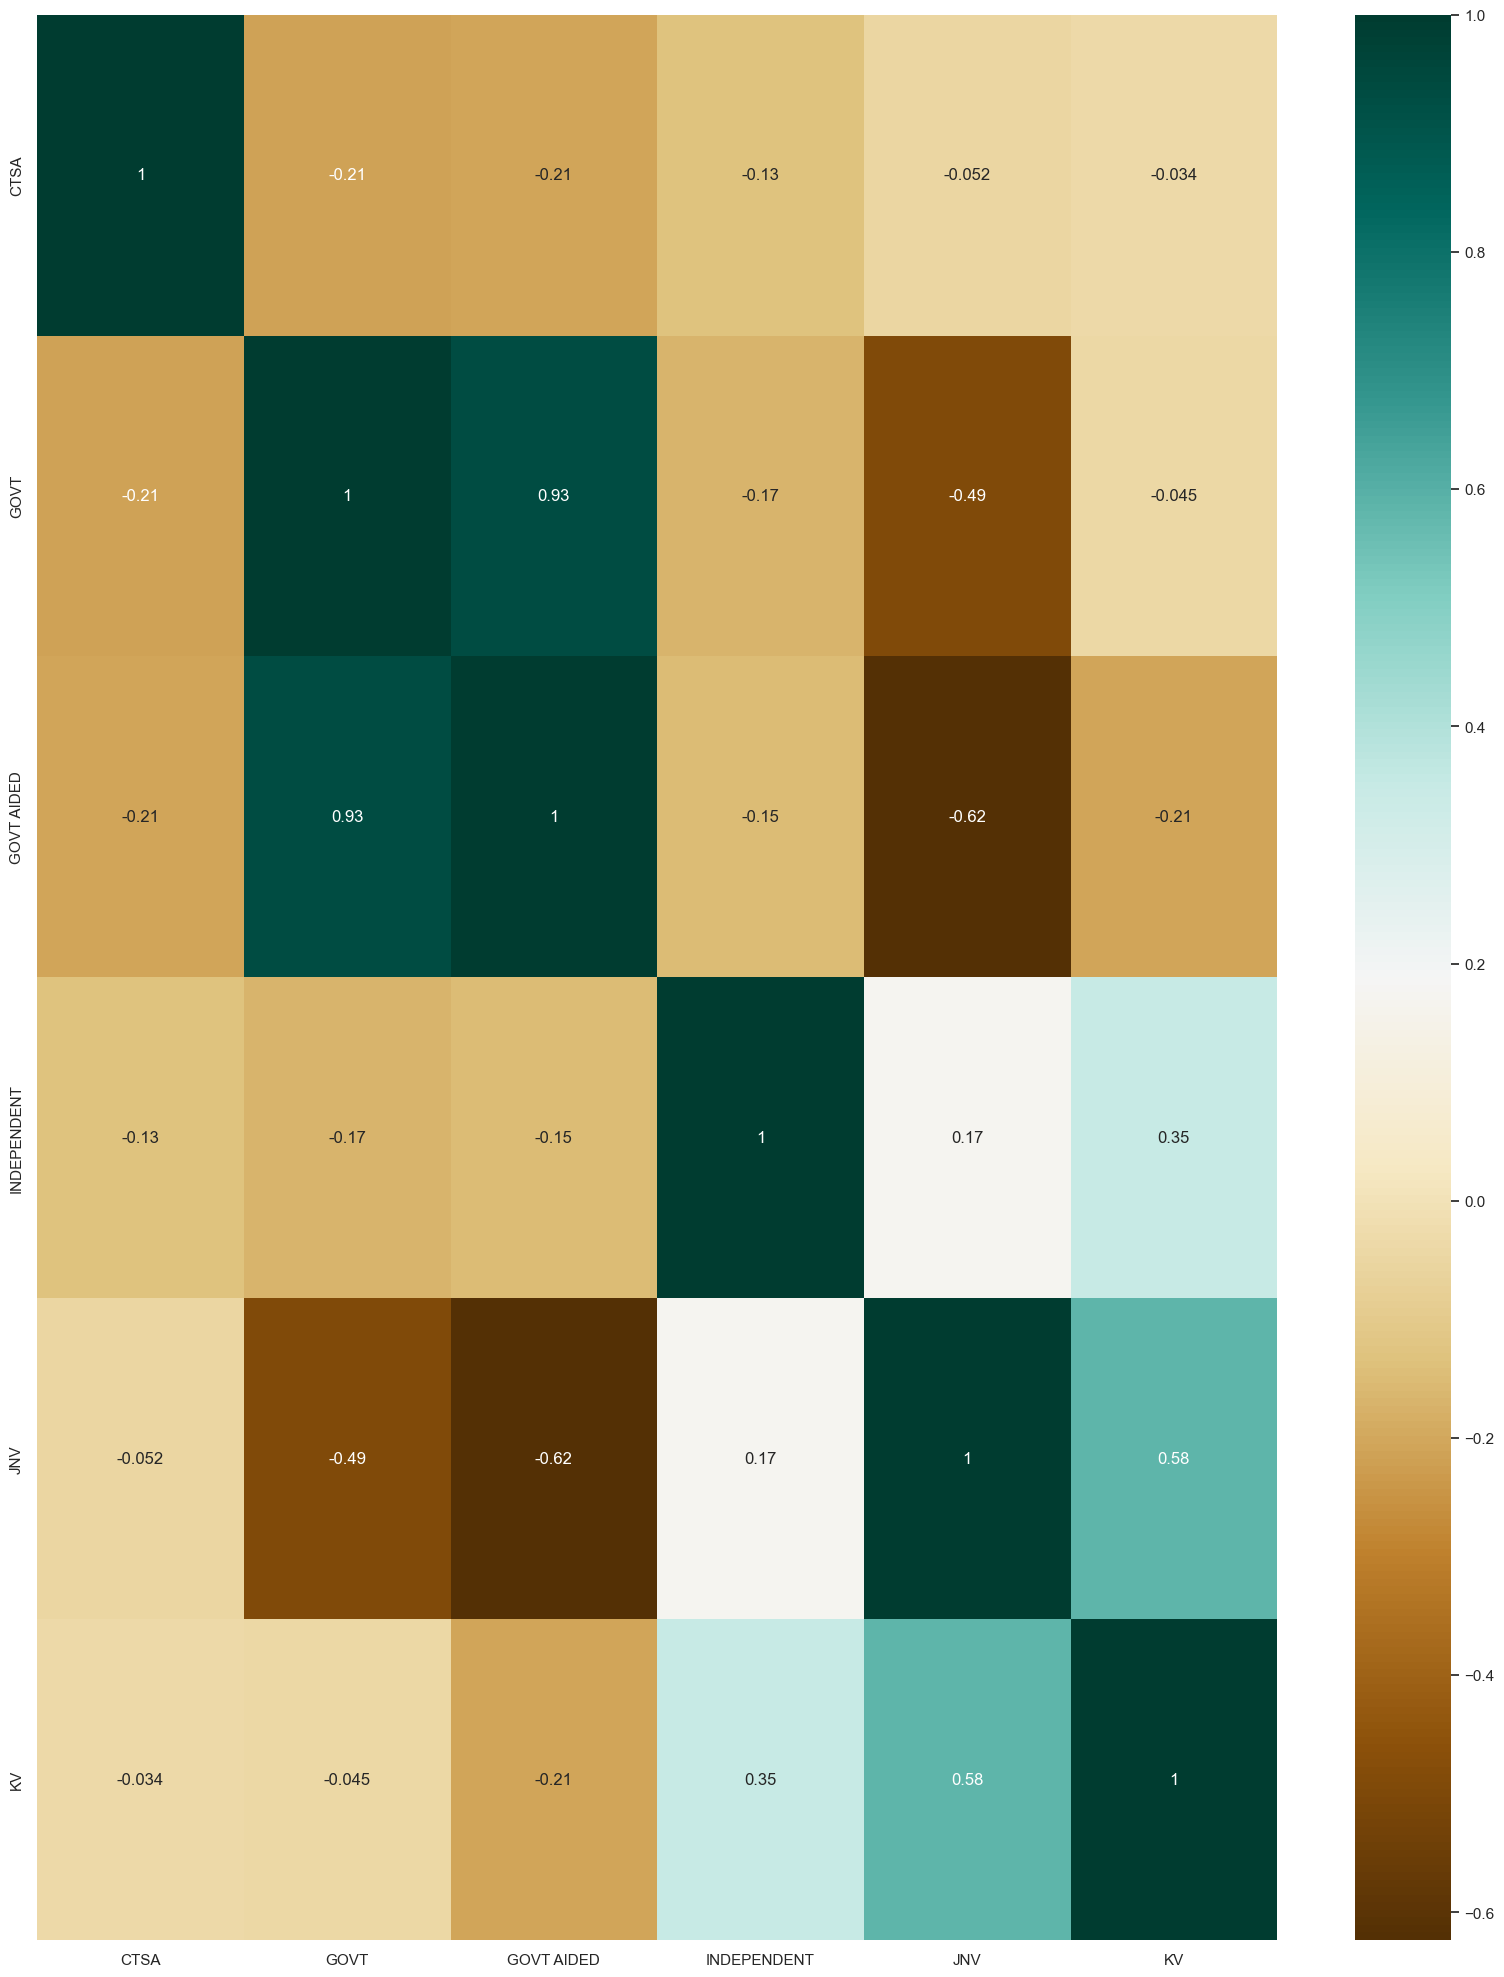

In [18]:
plt.figure(figsize=(20,25))
c = df.iloc[:,2:].corr()
sns.heatmap(c,cmap="BrBG",annot=True)

# Pair Plot

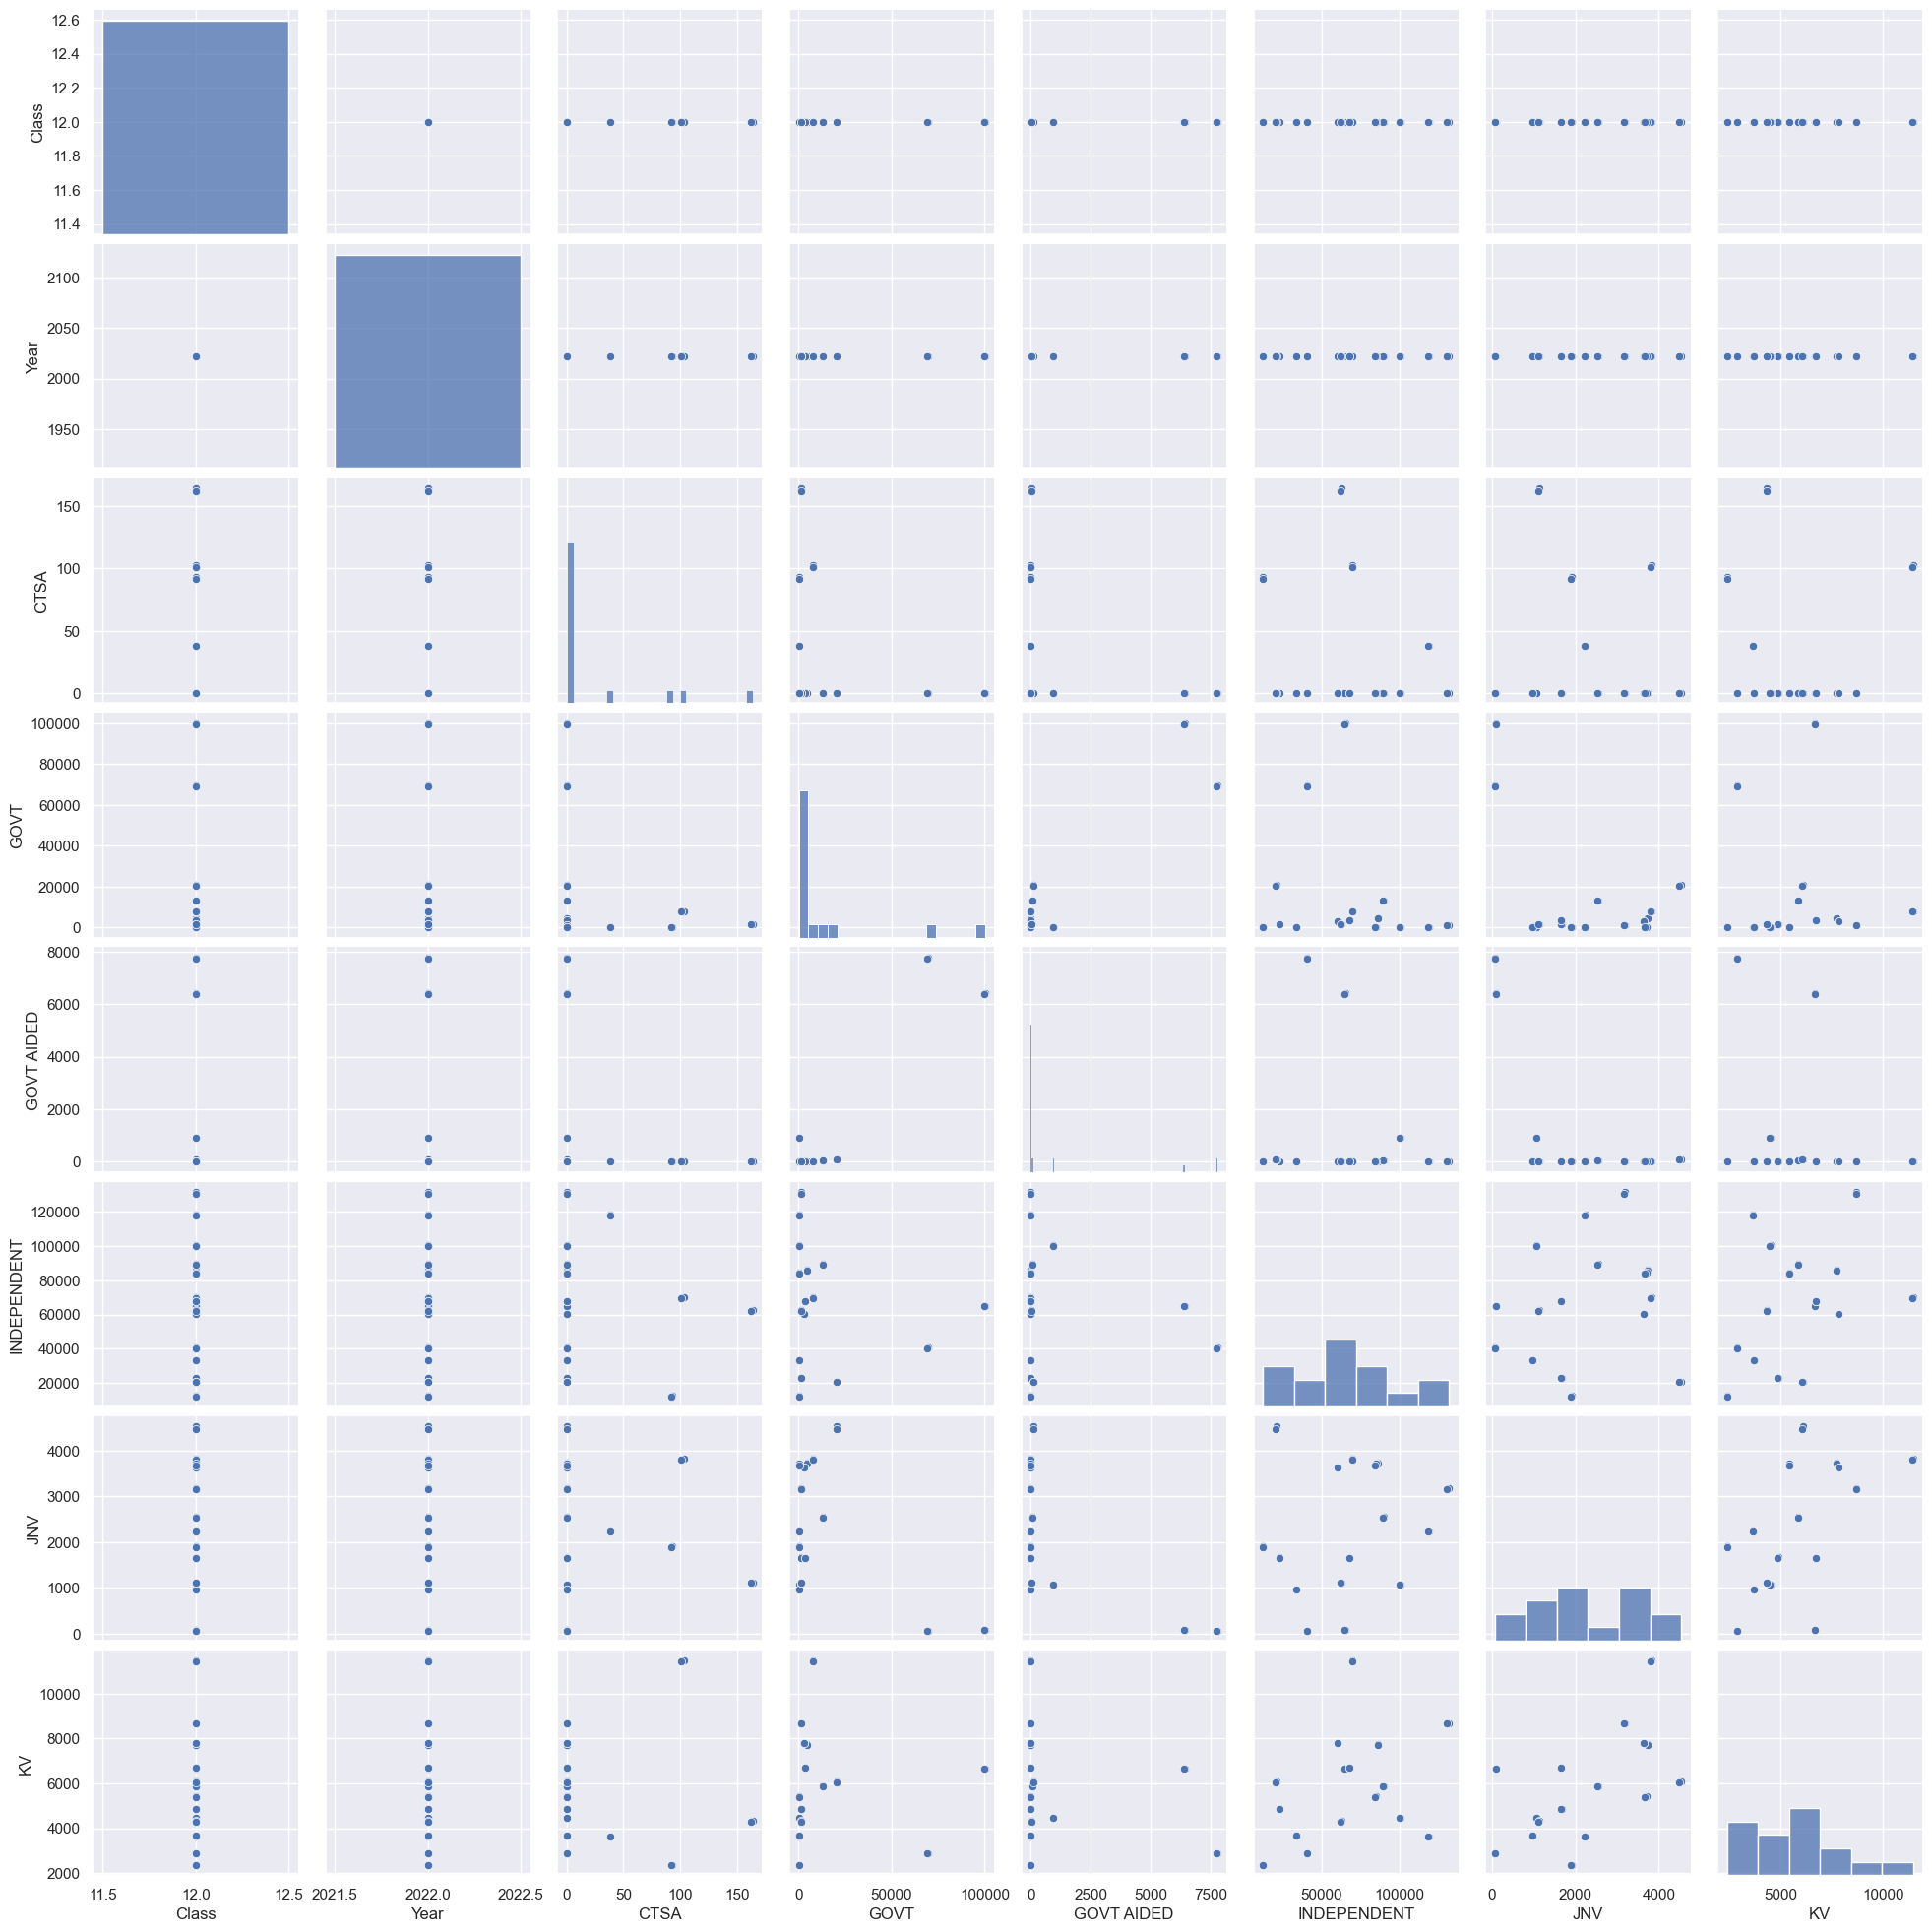

In [19]:
sns.pairplot(df)

# Scatter Plot

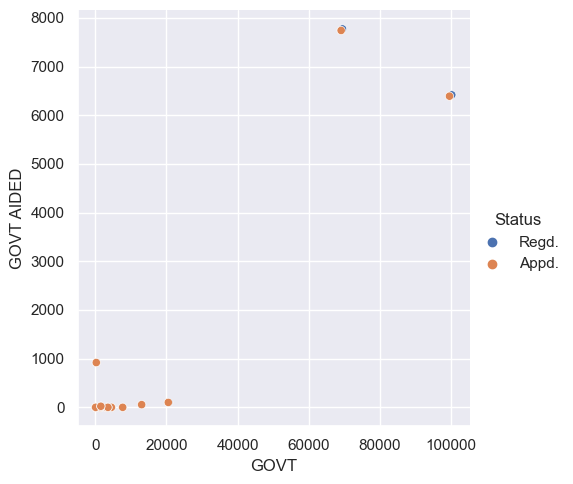

In [20]:
sns.relplot(x= 'GOVT', y='GOVT AIDED', hue='Status', data=df)

# Histogram

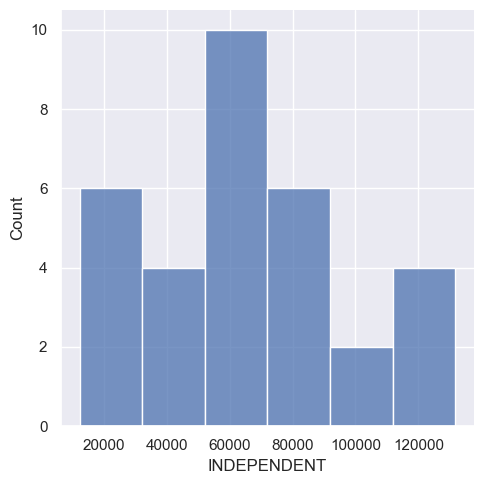

In [21]:
sns.displot(df['INDEPENDENT'])

# 1. Perform Normalization

# Scaling of the Features

In [22]:
def logistic(x):
  return 1.0/(1+np.exp(-x))

In [23]:
x = np.linspace(-6,6,1000)
y = logistic(x)

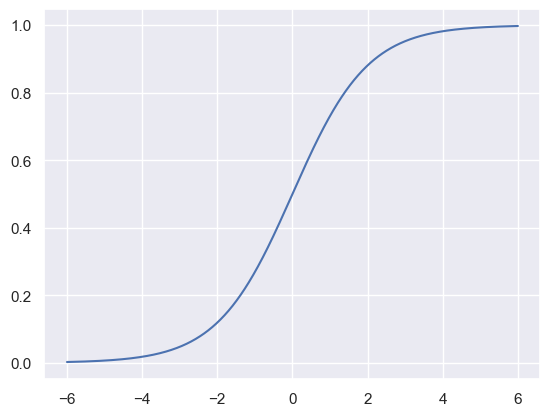

In [24]:
plt.plot(x,y)
plt.show()

In [25]:
from sklearn.datasets import load_iris

In [26]:
d = load_iris()

In [27]:
x = d["data"]

## 11th row from the top before Normalization

In [28]:
x[[11], :]

array([[4.8, 3.4, 1.6, 0.2]])

# Normalization

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()

In [31]:
X_norm = scaler.fit_transform(x)

In [32]:
X_norm

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

## 11th row from top after Normalization

In [33]:
X_norm[[11], :]

array([[0.13888889, 0.58333333, 0.10169492, 0.04166667]])

# 2. Standardization

In [34]:
def logistic(x):
  return 1.0/(1+np.exp(-x))

In [35]:
x = np.linspace(-6,6,1000)
y = logistic(x)

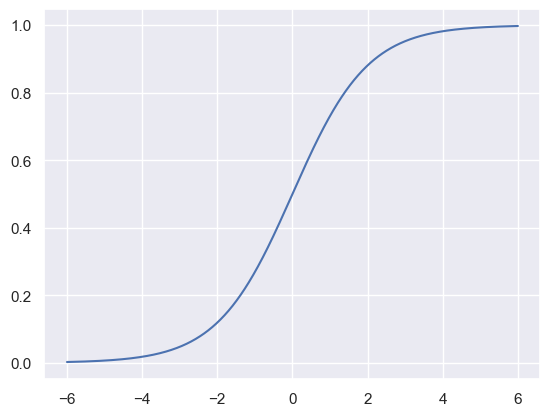

In [36]:
plt.plot(x,y)
plt.show()

In [37]:
from sklearn.datasets import load_iris

In [38]:
d = load_iris()

In [39]:
x = d["data"]

## 10th row from the top before Standarization

In [40]:
x[[10], :]

array([[5.4, 3.7, 1.5, 0.2]])

# Standardization

In [41]:
from sklearn.preprocessing import  StandardScaler

In [42]:
scaler = StandardScaler()

In [43]:
X_scaled = scaler.fit_transform(x)

In [44]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [45]:
col = X_scaled[:,0]

In [46]:
np.var(col)

1.0

# 10th row from the top after standardization

In [47]:
X_scaled[[10], :]

array([[-0.53717756,  1.47939788, -1.2833891 , -1.3154443 ]])